In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('train_hsbc_df.csv')

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_hsbc_df.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (410914, 9)
X_test shape: (102729, 9)
y_train shape: (410914,)
y_test shape: (102729,)


In [ ]:
print(X.shape)
print(y.shape)


(513643, 9)
(513643,)


In [ ]:
print(len(X))

513643


In [ ]:
expected_columns = ['step', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category', 'amount', 'fraud']
for col in expected_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")


In [ ]:
X = data[['step', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category', 'amount']]
y = data['fraud']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (513643, 8)
y shape: (513643,)


In [ ]:
if X.empty or y.empty:
    print("X or y is empty. Check data preprocessing.")


In [ ]:
print("Data shape:", data.shape)

Data shape: (513643, 10)


In [ ]:
import pandas as pd

file_path = 'train_hsbc_df.csv'
data = pd.read_csv(file_path)

data_cleaned = data.copy()

data_cleaned = data_cleaned.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)

data_cleaned['age'] = pd.to_numeric(data_cleaned['age'], errors='coerce')
data_cleaned['gender'] = data_cleaned['gender'].map({'M': 0, 'F': 1})
data_cleaned['category'] = data_cleaned['category'].astype('category').cat.codes
data_cleaned['customer'] = data_cleaned['customer'].astype('category').cat.codes
data_cleaned['merchant'] = data_cleaned['merchant'].astype('category').cat.codes
data_cleaned['zipcodeOri'] = data_cleaned['zipcodeOri'].astype('category').cat.codes
data_cleaned['zipMerchant'] = data_cleaned['zipMerchant'].astype('category').cat.codes

data_cleaned = data_cleaned.fillna(data_cleaned.median())

data_cleaned.to_csv('cleaned_train_hsbc_df.csv', index=False)

print(data_cleaned.head())

   step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     0      3219  3.0     0.0           0        34            0         4   
1     0       723  3.0     0.0           0        34            0         4   
2     0       362  3.0     0.0           0        44            0         6   
3     0      4040  3.0     0.0           0        44            0         6   
4     0       969  4.0     1.0           0         2            0        14   

   amount  fraud  
0   44.26      1  
1  324.50      1  
2  176.32      1  
3  337.41      1  
4  220.11      1  


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
file_path = 'cleaned_train_hsbc_df.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,3219,3.0,0.0,0,34,0,4,44.26,1
1,0,723,3.0,0.0,0,34,0,4,324.50,1
2,0,362,3.0,0.0,0,44,0,6,176.32,1
3,0,4040,3.0,0.0,0,44,0,6,337.41,1
4,0,969,4.0,1.0,0,2,0,14,220.11,1


In [ ]:
data.shape

(513643, 10)

In [ ]:
data.columns.values

array(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'], dtype=object)

In [ ]:
data.dtypes

step             int64
customer         int64
age            float64
gender         float64
zipcodeOri       int64
merchant         int64
zipMerchant      int64
category         int64
amount         float64
fraud            int64
dtype: object

In [ ]:
data.describe()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,513643.000000,513643.000000,513643.000000,513643.000000,513643.0,513643.000000,513643.0,513643.000000,513643.000000,513643.000000
mean,94.992629,2040.949765,3.006962,0.548328,0.0,23.869240,0.0,11.066021,37.915481,0.012071
std,51.063474,1185.054097,1.324512,0.497659,0.0,8.588319,0.0,2.818072,111.557455,0.109201
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,52.000000,1019.000000,2.000000,0.000000,0.0,18.000000,0.0,12.000000,13.740000,0.000000
50%,97.000000,2028.000000,3.000000,1.000000,0.0,18.000000,0.0,12.000000,26.920000,0.000000
75%,139.000000,3057.000000,4.000000,1.000000,0.0,30.000000,0.0,12.000000,42.550000,0.000000
max,179.000000,4111.000000,6.000000,1.000000,0.0,49.000000,0.0,14.000000,7665.560000,1.000000


In [ ]:
print(data.head())

   step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     0      3219  3.0     0.0           0        34            0         4   
1     0       723  3.0     0.0           0        34            0         4   
2     0       362  3.0     0.0           0        44            0         6   
3     0      4040  3.0     0.0           0        44            0         6   
4     0       969  4.0     1.0           0         2            0        14   

   amount  fraud  
0   44.26      1  
1  324.50      1  
2  176.32      1  
3  337.41      1  
4  220.11      1  


In [ ]:
features = ['step', 'amount', 'age', 'category', 'merchant', 'zipcodeOri', 'zipMerchant']
X = data[features]
y = data['fraud']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
roc_auc = auc(fpr, tpr)

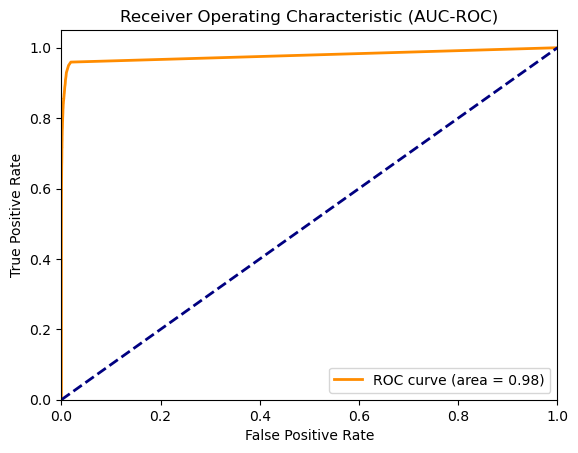

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    101480
       Fraud       0.85      0.76      0.80      1249

    accuracy                           1.00    102729
   macro avg       0.92      0.88      0.90    102729
weighted avg       1.00      1.00      1.00    102729



In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC-ROC)')
plt.legend(loc="lower right")
plt.show()

report = classification_report(y_test, rf_model.predict(X_test), target_names=['Non-Fraud', 'Fraud'])
print(report)

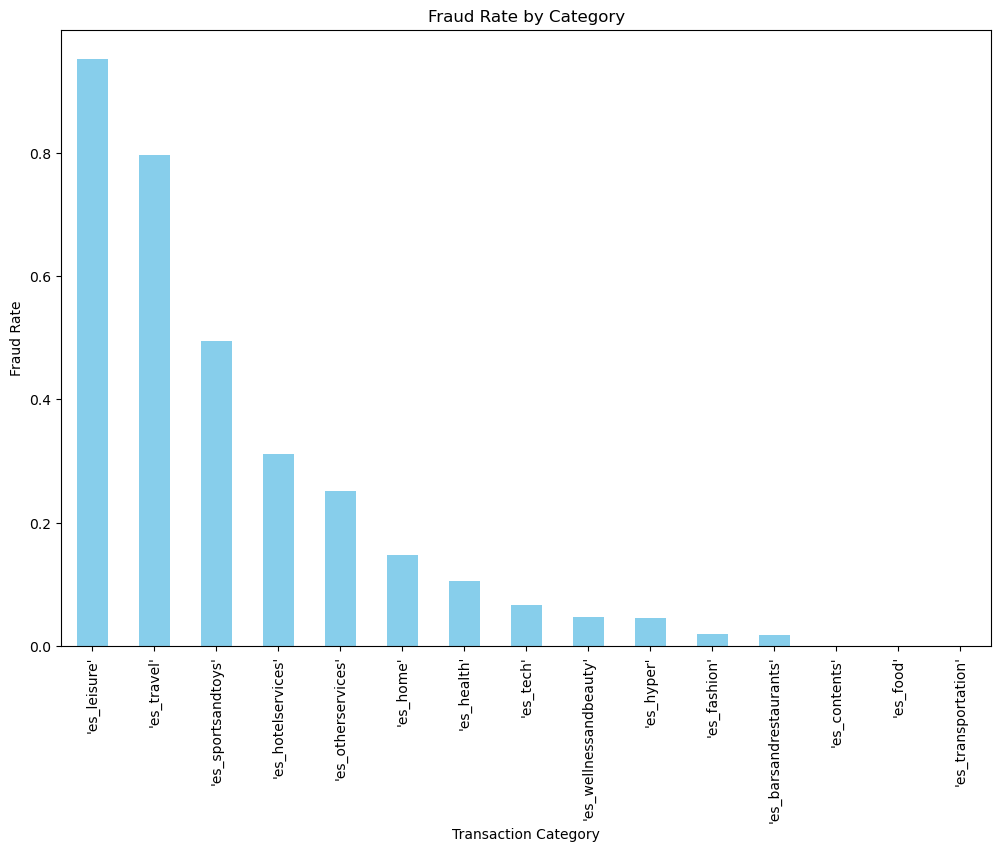

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'train_hsbc_df.csv'
df = pd.read_csv(file_path)

# Convert relevant columns to numeric (remove the quotes)
df['age'] = df['age'].str.replace("'", "").replace('U', None).astype(float)
df['amount'] = df['amount'].astype(float)
df['fraud'] = df['fraud'].astype(int)

# Fraud rate by category
plt.figure(figsize=(12, 8))
fraud_rate_by_category = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
fraud_rate_by_category.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.show()

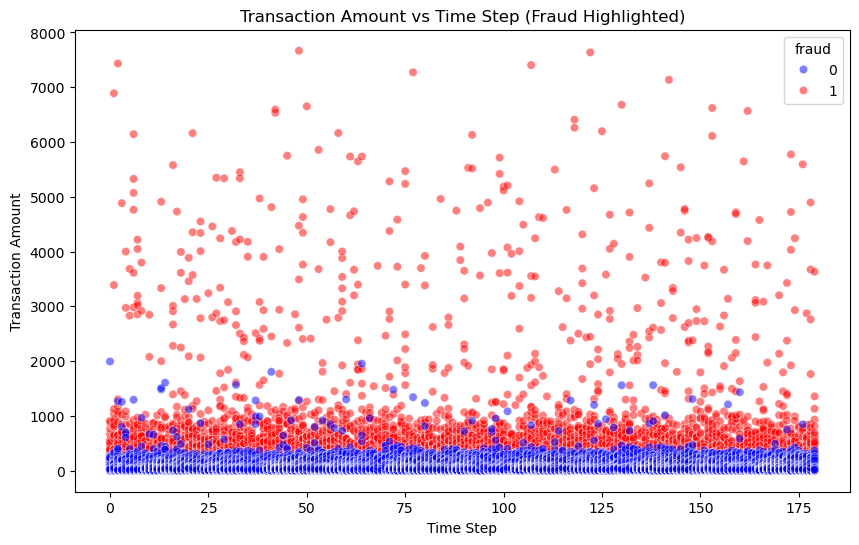

In [ ]:
# Scatter plot of time step vs transaction amount, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='step', y='amount', hue='fraud', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Transaction Amount vs Time Step (Fraud Highlighted)')
plt.xlabel('Time Step')
plt.ylabel('Transaction Amount')
plt.show()

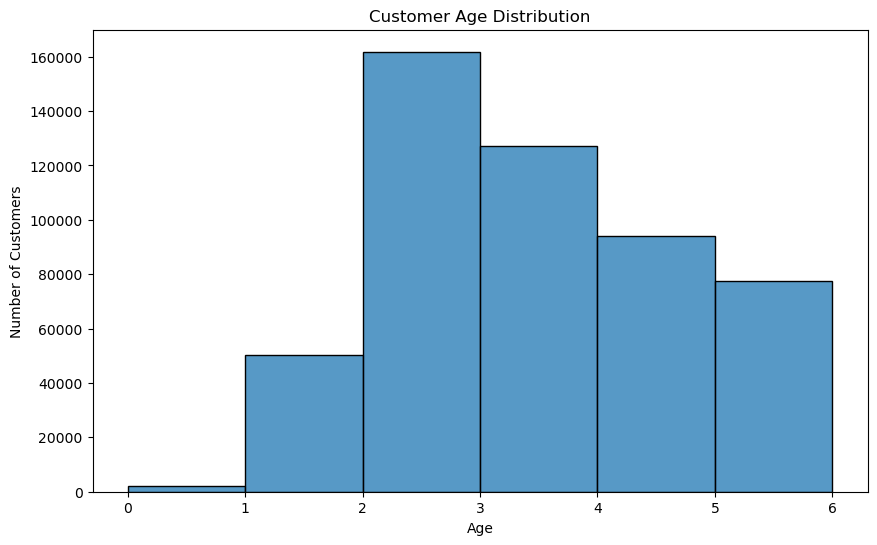

In [ ]:
# Customer age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=range(int(df['age'].min()), int(df['age'].max()) + 1, 1), kde=False)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

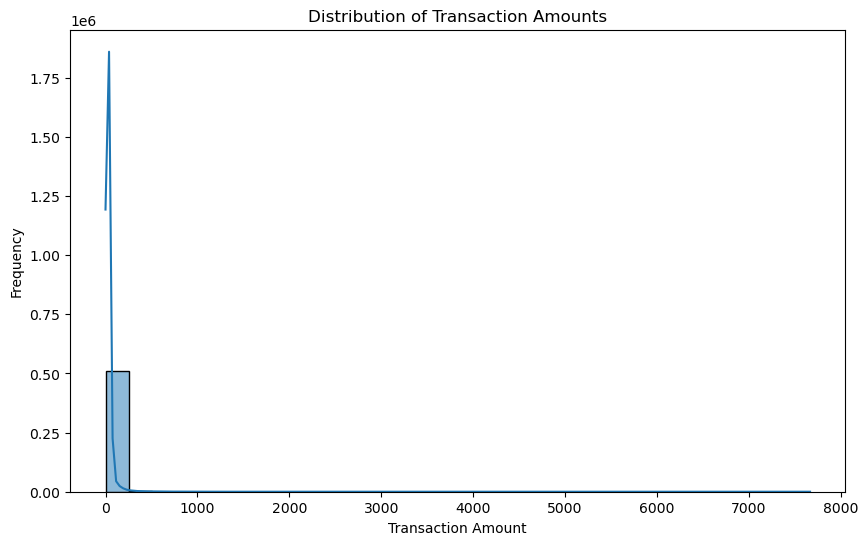

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'train_hsbc_df.csv')


['train_hsbc_df.csv']

In [ ]:
import joblib

# Save the trained model and scaler
joblib.dump(rf_model, 'train_hsbc_df.csv')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import pandas as pd
import joblib

# Load the trained pipeline
pipeline = joblib.load('fraud_detection_pipeline.pkl')

def predict_fraud(input_data):
    # Convert input data into DataFrame
    df = pd.DataFrame([input_data])

    # Make prediction using the pipeline
    prediction = pipeline.predict(df)

    return prediction[0]

def main():
    print("Enter the transaction details:")

    # Get user inputs
    step = int(input("Step: "))
    amount = float(input("Amount: "))
    age = int(input("Age: "))
    category = input("Category (e.g., 'es_health'): ")
    merchant = input("Merchant (alphanumeric value): ")
    zipcodeOri = input("Originating Zip Code: ")
    zipMerchant = input("Zip Merchant (numeric value): ")

    # Create a dictionary with input data
    input_data = {
        'step': step,
        'amount': amount,
        'age': age,
        'category': category,
        'merchant': merchant,
        'zipcodeOri': zipcodeOri,
        'zipMerchant': zipMerchant
    }

    # Predict and display the result
    result = predict_fraud(input_data)
    if result == 1:
        print("Yes Fraud")
    else:
        print("Not Fraud")

if __name__ == "__main__":
    main()


Enter the transaction details:


Step:  0
Amount:  176.32
Age:  3
Category (e.g., 'es_health'):  es_hotelservices
Merchant (alphanumeric value):  M857378720
Originating Zip Code:  28007
Zip Merchant (numeric value):  28007


Not Fraud


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
0	'C1160421902'	'3'	'M'	'28007'	'M857378720'	'28007'	'es_hotelservices'	176.32	1
